In [2]:
!pip install wordcloud


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [29]:
import pandas as pd
import re
import nltk
import pickle
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [30]:
data = pd.read_csv('senti_160k.csv', encoding='utf-8', header=None)

In [31]:
data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1048571,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048572,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048573,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048574,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [32]:
def remove_www(string):
    string = re.sub(
        r'((http|ftp|https)://)(([a-zA-Z0-9\._-]+\.[a-zA-Z]{2,6})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(:[0-9]{1,4})*(/[a-zA-Z0-9\&%_\./-~- ]*)?',
        ' URL ', string)
    return string.strip()

In [33]:
def remove_user(string):
    string = re.sub(r'(\@\w* )', ' USERNAME ', string)
    return string.strip()

In [34]:
def remove_other(string):
    string = re.sub(r' {2,}', ' ', string)
    string = re.sub(r'\n{1,}', ' ', string)
    return string.strip()

In [35]:
def remove_alpha_and_lower(string):
    string = string.lower()
    for i in range(26):
        ch = chr(i + 97)
        string = re.sub('[' + ch + ']{3,}', f'{ch}{ch}', string)
    return string.strip()

In [36]:
pos = data[data[0]==4].sample(10000)

In [37]:
pos

,0,1,2,3,4,5
857978,4,1574045911,Tue Apr 21 04:01:34 PDT 2009,NO_QUERY,MaheshKrishnan,Watching #IPL and the Prince of Kolkatta just ...
997748,4,1836133741,Mon May 18 07:26:13 PDT 2009,NO_QUERY,jlogan80,"To be honest, the book problem is my fault. M..."
961783,4,1827150352,Sun May 17 10:05:57 PDT 2009,NO_QUERY,Charli121,got a new fone today...it is AMAZING!!!
930995,4,1770683645,Mon May 11 21:58:16 PDT 2009,NO_QUERY,vizitch,@Oddernod it's great to see Chicago hockey bac...
968003,4,1827827805,Sun May 17 11:31:50 PDT 2009,NO_QUERY,nanavette,Going to make my brother watch Twilight. Be ba...
...,...,...,...,...,...,...
992881,4,1835312831,Mon May 18 05:41:41 PDT 2009,NO_QUERY,BeckTheBest,Lunch time Not that i have food to eat oh wel...
1045666,4,1957574618,Fri May 29 00:55:51 PDT 2009,NO_QUERY,zwee,@nscafe LOL. That became my desktop wallpaper ...
989543,4,1834886399,Mon May 18 04:30:57 PDT 2009,NO_QUERY,VioletsCRUK,@scotdoc Oh i see - there is nothing worse tha...
933348,4,1791808583,Wed May 13 21:10:11 PDT 2009,NO_QUERY,luisbrahh,@allisonpalmer dont B stressed!things will wor...


In [38]:
neg = data[data[0]==0].sample(10000)

In [39]:
neg

,0,1,2,3,4,5
388458,0,2054236344,Sat Jun 06 06:53:48 PDT 2009,NO_QUERY,HollyGiles,Been up since 7:30. i feel so awful right now
787678,0,2324956397,Thu Jun 25 04:26:35 PDT 2009,NO_QUERY,princesalmighty,watching bargain hunt..rushing to get ready fo...
89418,0,1755310526,Sun May 10 08:48:39 PDT 2009,NO_QUERY,kristincaustic,My head hurts. And no one wanted robinson's wi...
256507,0,1984742382,Sun May 31 15:43:03 PDT 2009,NO_QUERY,b1brittany,Will be on the bus to school soon.
68397,0,1692817774,Sun May 03 20:51:24 PDT 2009,NO_QUERY,ItsMariahxOxO,@yungfr3sh718 it was okkk. haha. but im sickk
...,...,...,...,...,...,...
741965,0,2266416223,Sun Jun 21 08:28:17 PDT 2009,NO_QUERY,AmyMcClintock,awwk ! Paul and everyone else cant come up an...
294889,0,1996719147,Mon Jun 01 15:34:08 PDT 2009,NO_QUERY,fpugirl,@Superbad24 jealous 2 more days for me!! Long ...
480390,0,2179224140,Mon Jun 15 08:48:53 PDT 2009,NO_QUERY,ArumK,@AryaSasongko Omg I'm gonna get a flu shot too...
355370,0,2043899576,Fri Jun 05 08:34:41 PDT 2009,NO_QUERY,deniseinaldo,Imma get ready for a big sermon tomorrow.. I'm...


In [40]:
texts = []
labels = []
all_tokens = set()
for i in pos[5]:
    i = remove_www(i)
    i = remove_user(i)
    i = remove_other(i)
    temp = []
    for j in nltk.word_tokenize(i):
        j = remove_alpha_and_lower(j)
        temp.append(j)
        all_tokens.add(j)
    texts.append(' '.join(temp))
    labels.append(4)

for i in neg[5]:
    i = remove_www(i)
    i = remove_user(i)
    i = remove_other(i)
    temp = []
    for j in nltk.word_tokenize(i):
        j = remove_alpha_and_lower(j)
        temp.append(j)
        all_tokens.add(j)
    texts.append(' '.join(temp))
    labels.append(0)

In [41]:
all_tokens = list(all_tokens)
with open('vocab.pkl', 'wb') as f:
    pickle.dump(all_tokens, f)

In [42]:
df = pd.DataFrame(columns=['text','label'])
df['text'] = texts
df['label'] = labels
df

,text,label
0,watching # ipl and the prince of kolkatta just...,4
1,"to be honest , the book problem is my fault . ...",4
2,got a new fone today ... it is amazing ! ! !,4
3,username it 's great to see chicago hockey bac...,4
4,going to make my brother watch twilight . be b...,4
...,...,...
19995,awwk ! paul and everyone else cant come up any...,0
19996,username jealous 2 more days for me ! ! long w...,0
19997,username omg i 'm gon na get a flu shot too . ...,0
19998,imma get ready for a big sermon tomorrow .. i ...,0


In [43]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.1, random_state=44)

In [44]:
df = pd.DataFrame(columns=['text', 'label'])
df['text'] = train_texts
df['label'] = train_labels
df.to_csv('train.csv', index=False, encoding='utf-8-sig')

In [45]:
df

,text,label
0,thank god its my friday today ! ive out and ab...,4
1,i hate snoring . remind me if my future husban...,4
2,"get prescription , clean bathroom , study",0
3,when did it get so cold ?,0
4,playing connect the dot with the random bruise...,0
...,...,...
17995,username which ones ?,4
17996,username that 's messed up ! it 's a stupid ti...,0
17997,radio slave at manre tonight ! so wish i were ...,0
17998,mostly mozart choir concert ! ! ! woo !,4


In [46]:
df = pd.DataFrame(columns=['text', 'label'])
df['text'] = val_texts
df['label'] = val_labels
df.to_csv('test.csv', index=False, encoding='utf-8-sig')

In [47]:
df

,text,label
0,grr coming on here was not a good way to start...,0
1,username welcome to twitter mom ! ! !,4
2,bah can only get the java client for workaway ...,0
3,username yay i 'll look .... so it was never o...,4
4,is watching taken . freaking me out about trav...,0
...,...,...
1995,ok twitterland i am back,4
1996,username i am so confused ! ! ! .. are you the...,4
1997,username you suck rachel lol blah you should b...,0
1998,broken snow globe ...,0


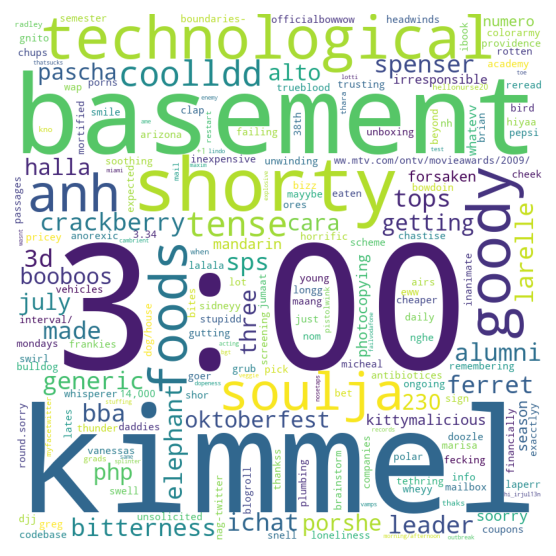

In [48]:
counter = Counter(all_tokens)
wordcloud = WordCloud(max_words=200,
                      width=800,
                      height=800,
                      background_color='white')
wordcloud.generate_from_frequencies(counter)
plt.rcParams["figure.dpi"] = 140
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(f'WordCloud.png')
plt.show()

In [49]:
lens = [len(i.split(' ')) for i in texts]
couter_len = Counter(lens).most_common()
sorted_counter = sorted(couter_len, key=lambda x: x[0], reverse=False)
x = [i for i, j in sorted_counter]
y = [j for i, j in sorted_counter]

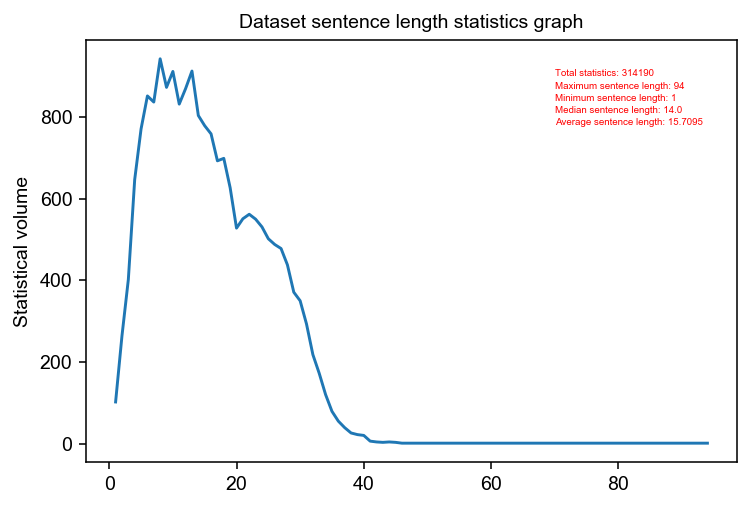

In [53]:
plt.plot(x, y, clip_on=False, markevery=1)
plt.title('Dataset sentence length statistics graph', fontsize=10)
# plt.xlabel('epoch', fontsize=15)
plt.ylabel('Statistical volume', fontsize=10)
plt.text(70, 900, f'Total statistics: {sum(lens)}', fontsize=5, color="r")
plt.text(70, 870, f'Maximum sentence length: {max(lens)}', fontsize=5, color="r")
plt.text(70, 840, f'Minimum sentence length: {min(lens)}', fontsize=5, color="r")
plt.text(70, 810, f'Median sentence length: {np.median(lens)}', fontsize=5, color="r")
plt.text(70, 780, f'Average sentence length: {np.mean(lens)}', fontsize=5, color="r")
plt.savefig(f'Statistics.png')
plt.show()